# 3. 신경망
수동으로 설정했던 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다. 

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

입력층 은닉층 출력층

### 3.1.2 퍼셉트론 복습

$x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하는 퍼셉트론

$$y=\begin{cases} 
  0 (b+w_1x_1+w_2x_2 \leq 0)\\
  1 (b+w_1x_1+w_2x_2 > 0)
\end{cases}$$

$b$는 편향, $w_1$과 $w_2$는 각 신호의 가중치

위 식을 간결한 형태로 다시 작성하면, 조건 분기의 동작을 하나의 함수로 나타낼 수 있다.

이 함수를 $h(x)$라 하자.  (0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)

$$y = h(b+w_1x_1+w_2x_2)$$

$$h(x)=\begin{cases} 
  0 (x \leq 0)\\
  1 (x > 0)
\end{cases}$$

입력 신호의 총합이 $h(x)$라는 함수를 거쳐 반환되어, 그 변환된 값이 y의 출력이 됨을 보여준다.  
### 3.1.3 활성화 함수의 등장

위 $h(x)$처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성함수라 한다.

입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 한다.

식을 다시 써보면, 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다. 

$$a = b+w_1x_1+w_2x_2$$

$$y=h(a)$$

## 3.2 활성화 함수

일반적으로 단순 퍼셉트론은 단층 네트워크에서 계단 함수를 활성화 함수로 사용한 모델을 가리킨다. 다층 퍼셉트론은 신경망을 가르킨다. 즉 여러층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크이다.

### 3.2.1 시그모이드 함수

신경망에서 자주 이용하는 활성화 함수  시그모이드를 나타낸 식

$$h(x)={1 \over 1+exp^{\ (-x)}}$$

### 3.2.2 계단 함수 구현하기  

In [ ]:
# 인수x는 실수만 받아드림
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
# 넘파일 배열도 지원하도록 변경
def step_function(x):
    y = x > 0
    return y.astype(np.int) # bool형에서 int형으로 바꿔줌

In [30]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [31]:
y = x > 0

In [32]:
y

array([False,  True,  True])

### 3.2.3 계단 함수의 그래프

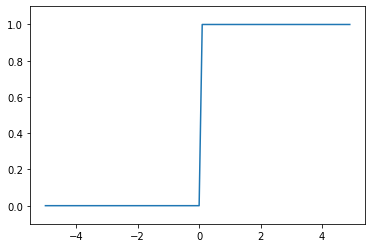

In [34]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

그림에서 보듯 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀐다. 

### 3.2.4 시그모이드 함수 구현하기

In [8]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))               

In [36]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)                                     

array([0.26894142, 0.73105858, 0.88079708])

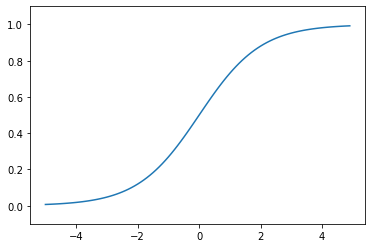

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정                
plt.show()                                           

### 3.2.5 시그모이드 함수와 계단 함수 비교

### 3.2.6 비선형 함수

계단함수와 시그모이드 함수의 공통점은 비선형 함수이다. 

선형함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로 똑같이 표현이 된다. 예를 들어 $h(x) = cx$를 활성화 함수로 사용한 3층 네트워크라면 $y(x) = h(h(h(x)))$가 된다. 이 계산은 $y(x)=c*c*c*x$ 처럼 곱셈을 세번 수행하지만, 실은 $y(x)=ax$와 똑같은 식이다.  $a=c^3$이라고 하면 그만이다. 

층을 쌓고 싶은 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다. 

### 3.2.7 ReLU 함수

최근에는 활성화 함수로 $ReLU^\text{Rectified Linear Unit, 렐루}$

ReLU는 입력이 0을 넘을면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다. 

$$h(x)=\begin{cases}
x (x>0)\\
0 (x \leq 0)
\end{cases}$$  

In [38]:
# Relu 함수 
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

우선 1차원 배열부터 살펴보자.

In [41]:
import numpy as np
A = np.array([1,2,3,4])
print(A)   # [1 2 3 4] 출력
np.ndim(A) # 1 출력
A.shape    # (4,) 출력
A.shape[0] # 4 출력 

[1 2 3 4]


(4,)

A.shape는 튜플을 반환한다. 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함이다.

### 3.3.1 다차원 배열

In [42]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [44]:
np.ndim(B)

2

In [45]:
B.shape

(3, 2)

'3X2 배열'인 B를 작성했다. 처음 차원은 원소 3개, 다음 차원은 원소가 2개. 2차원 배열은 특히 행렬이라고 부르고 배열의 가로 방향을 행, 세로 방향을 열이라고 한다. 

### 3.3.2 행렬의 곱

$$\begin{pmatrix}
  1 & 2 \\
  3 & 4 
\end{pmatrix}\begin{pmatrix}
  5 & 6 \\
  7 & 8 
\end{pmatrix}=\begin{pmatrix}
  19 & 22 \\
  43 & 50 
\end{pmatrix}$$

행렬 계산 

$1*5+2*7 = 19$

$3*5+4*7=43$

$1*6+2*8=22$

$3*6+4*8=50$

In [2]:
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [48]:
A.shape

(2, 2)

In [52]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [54]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [55]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

행렬 A의 1번째 차원의 원소 수와 행렬 B의 0번째 차원의 원소 수가 같아야 한다. 

### 3.3.3 신경망에서의 행렬 곱  
X와 W의 대응하는 차원의 원소 수가 같아야 한다.

In [56]:
X = np.array([1,2])
X.shape

(2,)

In [57]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [58]:
W.shape

(2, 3)

In [61]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

입력에서 출력까지의 순방향 처리로 구현한다.

### 3.4.1 표기법 설명

### 3.4.2 각 층의 신호 전달 구현하기

In [62]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [63]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [64]:
A1 = np.dot(X, W1) + B1

In [65]:
A1 

array([0.3, 0.7, 1.1])

In [67]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [68]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)


(3,)
(3, 2)
(2,)


In [69]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [70]:
# 2층에서 출력층으로의 신호 전달
def identity_function(x): # 출력층의 활성함수 (항등함수로 구현)
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [71]:
print(Y)

[0.31682708 0.69627909]


### 3.4.3 구현 정리

3층 신경망

In [73]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([[0.1, 0.2]])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[[0.31682708 0.69627909]]


In [74]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


### 3.5 출력층 설계하기
신경망은 분류와 회귀 모두에 이용 가능하다. 
분류이냐 회귀이냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
일반적으로 회귀에는 항등함수를, 분류에는 소프트맥스 함수를 사용한다. 

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
항등함수는 입력을 그대로 출력한다.
분류에 사용하는 소프트맥스 함수의 식은 다음과 같다. 

$$y_k = {exp(a_k) \over \sum_{i=1}^{ n} exp(a_i)}$$

$exp(x)$는 $e^x$을 뜻하는 지수함수, n은 출력층의 뉴런수, $y_k$는 그 중 k번째 출력임. 소프트맥스 함수의 분자는 입력신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수함수의 합으로 구성

In [75]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    

In [76]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [10]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

소프트맥스함수는 계산할 때 오버플로가 발생하는 문제를 가지고 있다. 지수 함수를 사용하기 때문에 쉽게 아주 큰 값을 내뱉는다. 

$$y_k = {exp(a_k) \over \sum_{i=1}^{ n} exp(a_i)}={Cexp(a_k) \over C\sum_{i=1}^{ n} exp(a_i)}={exp(a_k+logC) \over \sum_{i=1}^{ n} exp(a_i+logC)}$$

$$={exp(a_k+C') \over \sum_{i=1}^{ n} exp(a_i+C')}$$

소프트맥스의 지수함수를 계산할때 어떤 정수를 더해도 결과는 안 바뀐다. $C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로 입력 신호 중 최댓값을 이용하는 것이 바람직하다. 

In [ ]:
#소프트맥스 함수 다시 구현 
def softmax(a):
		c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징

소프트맥스 함수 출력을 확률로 해석할 수 있다.

In [83]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [84]:
np.sum(y)

1.0

소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 

소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 결과적으로 출력층의 소프트맥스 함수를 생략해도 된다. 현업에서는 지수 함수계산의 자원 낭비를 줄이고자  추론단계에서 이를 생략한다. 신경망을 학습시킬 때에는 사용한다. 

### 3.5.4 출력층의 뉴런 수 정하기

분류문제에서는 분류하고 싶은 클래 수로 설정하는 것이 일반적이다. 

## 3.6 손글씨 숫자 인식

이미 학습된 매개변수를 사용하여 학습과정은 생략하고, 추론 과정만 구현해보자. 추론 과정을 신겨망의 순전파라고도 한다. 

### 3.6.1 MNIST 데이터셋

28x28 크기의 회색조 이미지(1채널), 각 픽셀은 0~255까지의 값, 각 이미지에는 실제 의미하는 숫자가 레이블로 붙어 있다.

In [3]:
#import numpy as np
#import os
#MNist 데이터 셋 받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1) # as_frame=True 로 설정하면  dataframe 으로 반환함.

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
x_train, x_test, t_train, t_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
x_train

In [7]:
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0] 
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


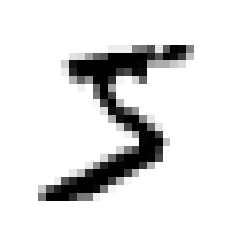

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #넘파이 타입 데이터를  이미지로 출력
plt.axis("off")
plt.show()

In [8]:
import sys, os
import numpy as np
import pickle

# 학습된 가중치 매개변수를 읽음 
# sample_weight.pkl 파일은 미리 프로그램과 같은 위치에 둔다. 
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)    
    return network

def softmax2(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def predict(newtwork, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) # sigmoid()는 위에 이미 정의한 함수 사용
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) # sigmoid()는 위에 이미 정의한 함수 사용
    a3 = np.dot(z2, W3) + b3
    y = softmax2(a3)
    
    return y

In [16]:
network = init_network()

x = x_test
t = t_test

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))       

<ipython-input-8-c8c10e36ce6b>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy:0.0


In [13]:
x_test[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
import os
print(os.getcwd())

C:\python\DeepLearning_fs


### 3.6.2 신경망의 추론 처리

In [4]:
# coding: utf-8
import sys, os
pd = sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from scratch1.dataset.mnist import load_mnist
from scratch1.common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("scratch1/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


### 3.6.3 배치처리
하나로 묶은 입력 데이터
배치처리는 컴퓨터로 계산할 때 큰 이점을 준다. 배치 처리를 수행함으로써 큰 배열로 이루어진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러번 계산하는 것보다 빠르다.   

신경망 각 층의 배열 형상의 추이  
`X    W1      W2      W3     -> Y  `  
`784  784x50  50x100 100x10     10  `  

배치 처리를 위한 배열들의 형상 추이  
`X       W1     W2     W3     -> Y  `  
`100x784 784x50 50x100 100x10   100x10  `  


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print('Accuracy:'+str(float(accuracy_cnt)/len(x)))

### 정리하기
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다. 
- 넘파이의 다차원배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다. 
- 기계학습 문제는 크게 회귀와 분류
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수, 분류에서는 주로 소프트맥스 함수 이용
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다. 
- 입력 데이터를 묶는 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다. 